<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W1DAY3_MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1DAY3: MNIST Digit Classifier

Description:
- Train a neural network to recognize handwritten digits (0–9) from the MNIST dataset using PyTorch.
- here we will be  working with image datasets, DataLoaders, and multi-class classification.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [ ]:
# download and preprocess mnist data
transform = transforms.ToTensor()
train_ds = datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_ds = datasets.MNIST(root='data',train=False,download=True,transform=transform)

In [ ]:
# load the data into pytoch dataloders

train_dl = DataLoader(dataset=train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(dataset=test_ds, batch_size=1000)

In [ ]:
# define a simple feed-forward neureal network

class DigitClassifier(nn.Module):
  def __init__(self):
    super(DigitClassifier, self).__init__()
    self.fc1 = nn.Linear(28*28, 128) # input layer to hidden layer
    self.fc2 = nn.Linear(128, 10) # hidden layer to ouput layer (10) clasess

  def forward(self, x):
    x = x.view(-1, 28*28) # flatten image
    x = F.relu(self.fc1(x)) # apply relu activation to fc1 output
    return self.fc2(x) # output logits for 10 digits


In [ ]:
model = DigitClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):
  for images, ylabels in train_dl:
    plabels = model(images)
    loss = criterion(plabels, ylabels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}, Loss: {loss.item()}')

correct = 0
total = 0
with torch.no_grad():
  for images, ylabels in test_dl:
    plabels = model(images)
    _, predicted = torch.max(plabels.data, 1) # get class with highest score
    total += ylabels.size(0)
    correct += (predicted == ylabels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Epoch 1, Loss: 0.08303291350603104
Epoch 2, Loss: 0.28981199860572815
Epoch 3, Loss: 0.08592115342617035
Epoch 4, Loss: 0.05309990793466568
Epoch 5, Loss: 0.03002963215112686
Epoch 6, Loss: 0.004898435901850462
Epoch 7, Loss: 0.01970767043530941
Epoch 8, Loss: 0.011266766116023064
Epoch 9, Loss: 0.023466771468520164
Epoch 10, Loss: 0.11260908097028732
Test Accuracy: 97.74%


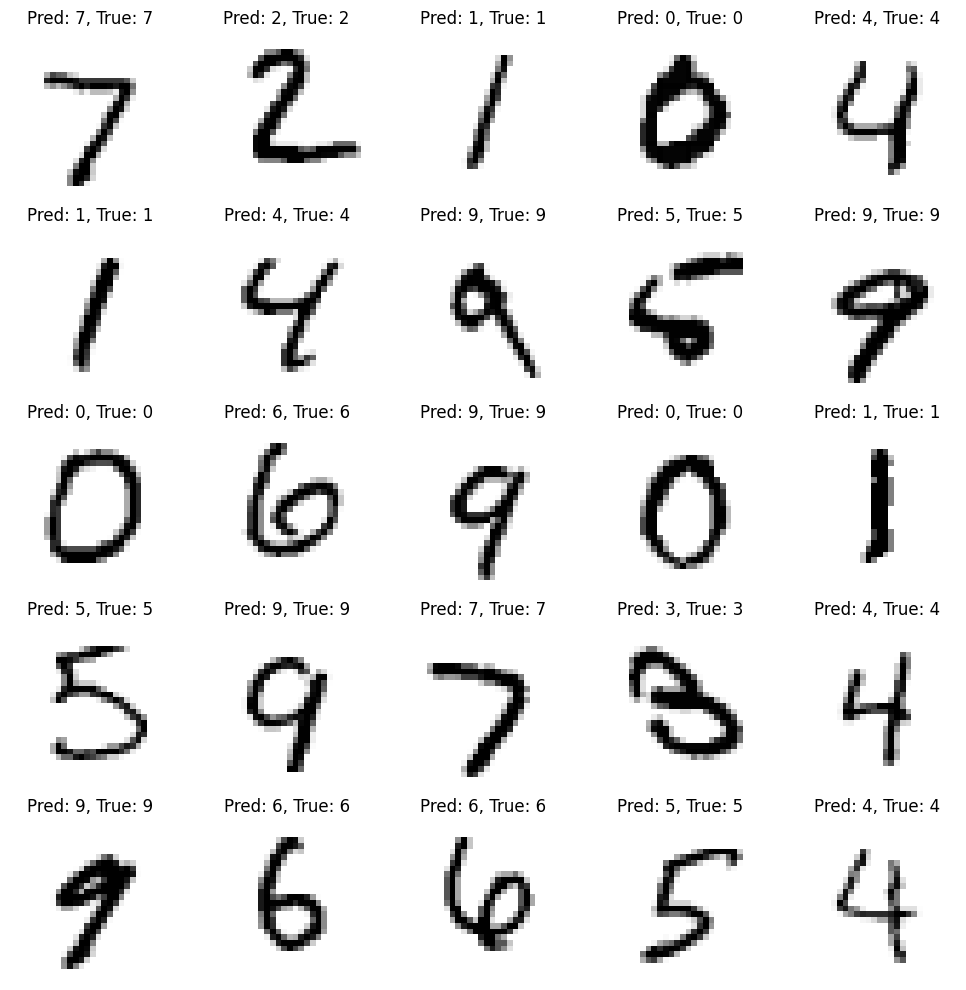

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data
images, labels = next(iter(test_dl))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# Plot a sample of images and their predictions
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
    plt.title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

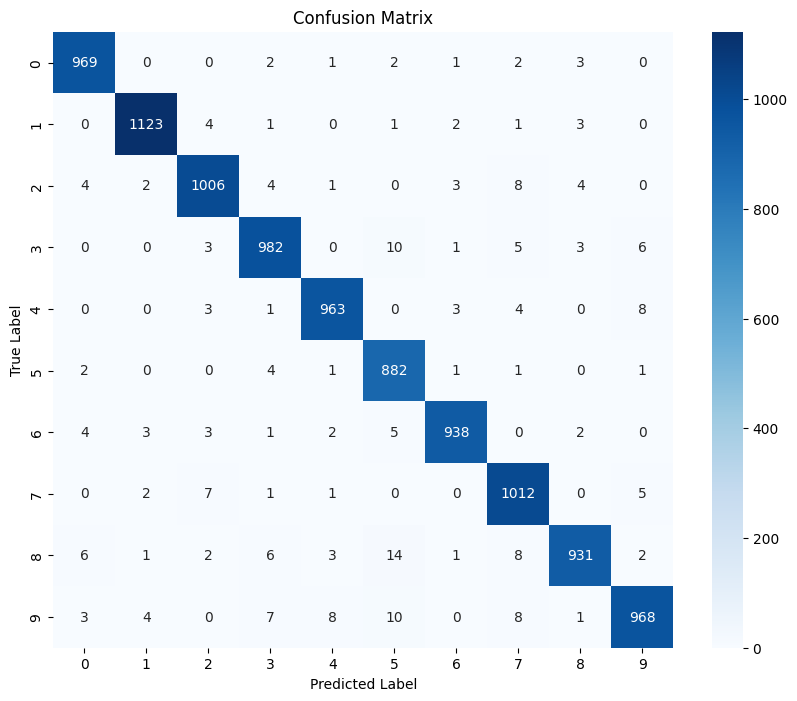

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

all_predicted = []
all_ylabels = []

with torch.no_grad():
    for images, ylabels in test_dl:
        plabels = model(images)
        _, predicted = torch.max(plabels.data, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_ylabels.extend(ylabels.cpu().numpy())

cm = confusion_matrix(all_ylabels, all_predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: from confusion matrix, range the best to the worst class predicted

import numpy as np
# Calculate precision and recall for each class
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)

# Calculate F1-score for each class (harmonic mean of precision and recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Handle potential division by zero where a class had no true instances or no predictions
f1_score = np.nan_to_num(f1_score)

# Create a dictionary to store class performance
class_performance = {}
for i in range(10):
    class_performance[i] = f1_score[i]

# Sort classes by F1-score (best to worst)
sorted_classes = sorted(class_performance.items(), key=lambda item: item[1], reverse=True)

print("Classes ranked by performance (F1-score, best to worst):")
for class_label, score in sorted_classes:
    print(f"Class {class_label}: {score:.4f}")

# Optionally, you could also rank by precision or recall if desired
# sorted_by_precision = sorted(class_performance.items(), key=lambda item: precision[item[0]], reverse=True)
# print("\nClasses ranked by precision (best to worst):")
# for class_label, score in sorted_by_precision:
#     print(f"Class {class_label}: {precision[class_label]:.4f}")

# sorted_by_recall = sorted(class_performance.items(), key=lambda item: recall[item[0]], reverse=True)
# print("\nClasses ranked by recall (best to worst):")
# for class_label, score in sorted_by_recall:
#     print(f"Class {class_label}: {recall[class_label]:.4f}")

Classes ranked by performance (F1-score, best to worst):
Class 1: 0.9894
Class 0: 0.9848
Class 6: 0.9832
Class 4: 0.9817
Class 2: 0.9767
Class 7: 0.9745
Class 3: 0.9728
Class 5: 0.9714
Class 8: 0.9693
Class 9: 0.9685
